In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import os
os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"
import torch

/Users/antonis/miniforge3/envs/python3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'mps'
torch.mps.empty_cache()

tokenizer = CLIPTokenizer('data/tokenizer_vocab.json', merges_file= 'data/tokenizer_merges.txt')
model_file = 'data/v1-5-pruned-emaonly.ckpt'

In [3]:
models = model_loader.preload_models_from_standard_weights(model_file, device)


## text to image

In [4]:

prompt = "A unicorn flying on the moon"
uncond_prompt = ""
do_cfg = True
cfg_scale = 0 # min: 1, max: 14

100%|██████████| 50/50 [01:14<00:00,  1.50s/it]


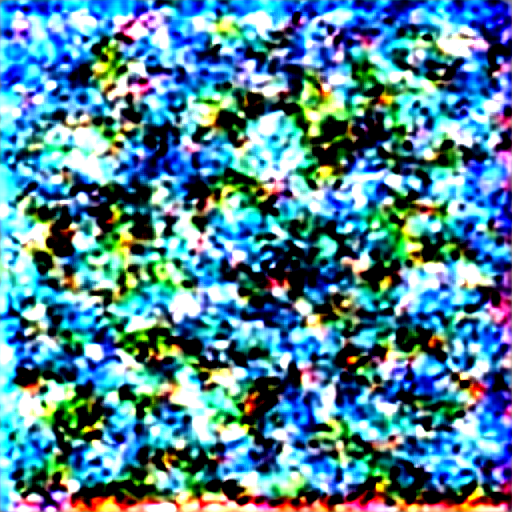

In [5]:
sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=None,
    strength=0.8,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=device,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)